In [ ]:
pip install google_play_scraper

     |████████████████████████████████| 51kB 2.5MB/s 
  Created wheel for google-play-scraper: filename=google_play_scraper-0.1.2-cp36-none-any.whl size=22280 sha256=4e22ff5fad115775272c1ffa59cbb34612c3c1701a7c4d4c519d0fd751a9966b
  Stored in directory: /root/.cache/pip/wheels/c3/0c/dc/847f7da787b7d2c28b26a5062f86eac3f16a8cb0bdfdc1f308
Successfully built google-play-scraper


In [ ]:
pip install fuzzywuzzy

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

True

In [ ]:
pip install fuzzywuzzy[speedup]

     |████████████████████████████████| 51kB 2.5MB/s 
  Created wheel for python-levenshtein: filename=python_Levenshtein-0.12.1-cp36-cp36m-linux_x86_64.whl size=149167 sha256=00b02603807814f947e17656f4460d96feeead506dfbb2fac1149f36058492db
  Stored in directory: /root/.cache/pip/wheels/ae/69/ea/4798f98317cbab35d78fea64d36bd7b2b18faca88568ef15b0
Successfully built python-levenshtein


In [ ]:
pip install emoji

     |████████████████████████████████| 51kB 2.6MB/s 
  Created wheel for emoji: filename=emoji-0.6.0-cp36-none-any.whl size=49717 sha256=3450fdccdcaee2665fade4c197dc302c4c1b63941480a659f932913d0721db0a
  Stored in directory: /root/.cache/pip/wheels/46/2c/8b/9dcf5216ca68e14e0320e283692dce8ae321cdc01e73e17796
Successfully built emoji


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from tqdm import tqdm
import emoji
from gensim.parsing.preprocessing import remove_stopwords
import gensim
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet as wn
from nltk.sentiment import SentimentIntensityAnalyzer
from google_play_scraper import Sort, reviews
sia=SentimentIntensityAnalyzer()

In [ ]:
from google_play_scraper import Sort, reviews
result, continuation_token = reviews('com.indiaBulls',lang='en',country='us',sort=Sort.NEWEST,count=300000)

In [ ]:
df=pd.DataFrame.from_dict(result)

In [ ]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOFC9xgkxp37WXIAKtUcW8Csg2smUEb8nXkhCWz...,Suhaan Barfi Khan,https://play-lh.googleusercontent.com/a-/AOh14...,I used my dhani card at two petrol pump pos it...,2,0,3.4.6,2021-01-21 12:23:12,None,NaT
1,gp:AOqpTOEnfzWDdNImH3HlrY5gaHeuK7fwOLO7aZ1iuML...,GAJANAN GAIKWAD,https://play-lh.googleusercontent.com/a-/AOh14...,"Good But Customer Service No Provide,",2,0,3.4.6,2021-01-21 12:23:05,None,NaT
2,gp:AOqpTOFSS-4_QeB8GMCX8YYwwm8GoS1rlqnTxUtA3I6...,Struggler jatt,https://play-lh.googleusercontent.com/a-/AOh14...,Nice,5,0,3.4.6,2021-01-21 12:21:27,None,NaT
3,gp:AOqpTOGCmHfyZ5aunMnqs3wMayK_nH0HXBjx331fEpd...,Sandeep S,https://play-lh.googleusercontent.com/a-/AOh14...,Only one to saying Worst app,1,0,3.4.6,2021-01-21 12:15:05,None,NaT
4,gp:AOqpTOEH2cn_sq09eRUTD_zAauoy2U8ZMnsd7whJ3KM...,IBAN FF,https://play-lh.googleusercontent.com/-Y6_fKRJ...,Good app,5,0,3.4.6,2021-01-21 12:09:53,None,NaT


In [ ]:
df.drop(['reviewId','userName','userImage','thumbsUpCount','reviewCreatedVersion','replyContent','repliedAt'],axis=1,inplace=True)

In [ ]:
df.sort_values(by='at')

,content,score,at
299999,Very good service,5,2018-01-19 10:21:07
299998,It's very fast and nice,5,2018-01-19 10:41:10
299997,fake add 3minuts ₹5 lakh,1,2018-01-19 11:07:16
299996,Sbse bkwas app dekhi he mene sari Jankari lekr...,1,2018-01-19 11:08:45
299995,This fake app...,1,2018-01-19 11:13:26
...,...,...,...
4,Good app,5,2021-01-21 12:09:53
3,Only one to saying Worst app,1,2021-01-21 12:15:05
2,Nice,5,2021-01-21 12:21:27
1,"Good But Customer Service No Provide,",2,2021-01-21 12:23:05


In [ ]:
import datetime
x=datetime.datetime(2020,1,1)

In [ ]:
df=df.loc[df['at']>=x]

In [ ]:
from google.colab import files
df.to_csv('Dhani_1year_21-01-21.csv')
files.download('Dhani_1year_21-01-21.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.drop('at',axis=1,inplace=True)
li=[]
for st in tqdm(df.content):
  st=str(st)
  sent=emoji.demojize(st)
  sent=sent.replace(':',' ')
  sent=sent.replace('_',' ')
  sent=sent.lower()
  sent=re.sub(r"[^A-Za-z ']",'',sent)
  sent=re.sub(r"l...$",'loan',sent)
  sent=re.sub(r'a.p$','app',sent)
  sent=remove_stopwords(sent)
  li.append(sent)

df['cleaned']=li
df.head()

,content,score,cleaned
0,I used my dhani card at two petrol pump pos it...,2,dhani card petrol pump pos showed insufficient...
1,"Good But Customer Service No Provide,",2,good customer service provide
2,Nice,5,nice
3,Only one to saying Worst app,1,saying worst app
4,Good app,5,good app


In [ ]:
wnl=WordNetLemmatizer()
def labeller(label):
  if label=='J':
    return wn.ADJ
  elif label=='N':
    return wn.NOUN
  elif label=='V':
    return wn.VERB
  elif label=='R':
    return wn.ADV
lm=[]
wvex=[]
for sent in tqdm(df.cleaned):
  sent=str(sent)
  toks=word_tokenize(sent)
  for tok in toks:
    pos_l=pos_tag(word_tokenize(tok))
    label=pos_l[0][1][0]
    pos=labeller(label)
    try:
      lemm=wnl.lemmatize(tok,pos)
    except:
      lemm=wnl.lemmatize(tok)
    lm.append(lemm)
  wvex.append(lm)
  lm=[]
df['word__vec']=wvex
df.head()
df.to_csv('Dhani_1year_2021-01-21 18:16:08.csv')
files.download('Dhani_1year_2021-01-21 18:16:08.csv')

100%|██████████| 186080/186080 [05:24<00:00, 573.19it/s]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.head(10)

,content,score,cleaned,word__vec
0,I used my dhani card at two petrol pump pos it...,2,dhani card petrol pump pos showed insufficient...,"[dhani, card, petrol, pump, po, show, insuffic..."
1,"Good But Customer Service No Provide,",2,good customer service provide,"[good, customer, service, provide]"
2,Nice,5,nice,[nice]
3,Only one to saying Worst app,1,saying worst app,"[say, bad, app]"
4,Good app,5,good app,"[good, app]"
5,Ford Application I am order the card but card ...,1,ford application order card card receive accou...,"[ford, application, order, card, card, receive..."
6,Nice,5,nice,[nice]
7,When I am activating my digital card it showin...,1,activating digital card showing activated,"[activate, digital, card, show, activate]"
8,Very very worst.app is dead slow.i tried all t...,1,worstapp dead slowi tried transactions wrongso...,"[worstapp, dead, slowi, try, transaction, wron..."
9,Time waste annesary I applied loan but they di...,5,time waste annesary applied loan didn't given ...,"[time, waste, annesary, apply, loan, do, n't, ..."


In [ ]:
df.count()

content      186080
score        186080
cleaned      186080
word__vec    186080
dtype: int64

In [ ]:
sentences=[]
count=0
for toks in tqdm(df.word__vec):
  if len(toks)>4:
    sentences.append(toks)
    count+=1
print(count)
wwv=gensim.models.Word2Vec(sentences,min_count=1,size=100,window=4)
wwv.wv.most_similar(positive=['interest','rate','high'],topn=40)

100%|██████████| 186080/186080 [00:00<00:00, 1583180.02it/s]


78285


[('low', 0.8593831062316895),
 ('rat', 0.8349336981773376),
 ('competitive', 0.8322534561157227),
 ('compare', 0.8271749019622803),
 ('vharges', 0.8201342225074768),
 ('huge', 0.8200268149375916),
 ('cheap', 0.8121854662895203),
 ('intrest', 0.805206298828125),
 ('cost', 0.7972724437713623),
 ('reasonable', 0.7960619330406189),
 ('dhanipersonalloaninterest', 0.787317156791687),
 ('roi', 0.7785361409187317),
 ('percent', 0.7613836526870728),
 ('moneyview', 0.7608870267868042),
 ('affordable', 0.7555391788482666),
 ('interesti', 0.7491728067398071),
 ('jhada', 0.7487687468528748),
 ('dcentinterest', 0.7480078935623169),
 ('offering', 0.7470977306365967),
 ('chief', 0.7466021776199341),
 ('denomination', 0.745773434638977),
 ('neck', 0.7445018291473389),
 ('accord', 0.7434502840042114),
 ('benefit', 0.7426939606666565),
 ('thrs', 0.7358570694923401),
 ('decent', 0.7355939149856567),
 ('intress', 0.7337446212768555),
 ('palanty', 0.7321503162384033),
 ('acceptation', 0.7315616607666016),
 

In [ ]:
total=count

In [ ]:
i=0
for sent in df['cleaned']:
  print(sent)
  i+=1
  if i==5:
    break

dhani card petrol pump pos showed insufficient balance balance wallet got stucked worst experience
good customer service provide
nice
saying worst app
good app


100%|██████████| 186080/186080 [00:51<00:00, 3626.73it/s]



 3490
0.044580698729003


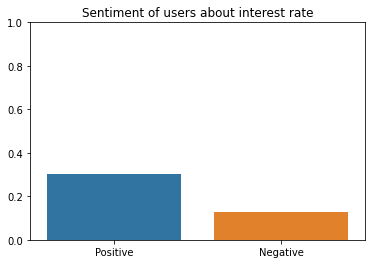

In [ ]:
from fuzzywuzzy import fuzz
from nltk.tokenize import word_tokenize
ind=0
count=0
review_about_A1=''
li_A1=[]
for sent in tqdm(df['cleaned']):
  sent=str(sent)
  toks=word_tokenize(sent)
  if  (fuzz.partial_token_set_ratio('interest rate',sent)>90) or (fuzz.token_set_ratio('loan rate',sent)>90)or (fuzz.token_set_ratio('high interest rate',sent)>90)or (fuzz.token_set_ratio('low interest rate',sent)>90):
    ind=1
  for tok in toks:
    if (fuzz.ratio('interest',tok)>80) or (fuzz.ratio('rate',tok)>=80) :
      ind=1
  if ind==1:
    count+=1
    review_about_A1=review_about_A1+sent+' '
    li_A1.append(sent)
  ind=0

print('\n',count)
print(count/total)
dic=sia.polarity_scores(review_about_A1)
print(dic)
values=[dic['pos'],dic['neg']]
keys=['Positive','Negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,1))
plt.title('Sentiment of users about interest rate')
plt.show()

In [ ]:
print(dic)

{'neg': 0.127, 'neu': 0.57, 'pos': 0.303, 'compound': 1.0}


In [ ]:
t=186080

In [ ]:
df.count()

content      186080
score        186080
cleaned      186080
word__vec    186080
dtype: int64

100%|██████████| 186080/186080 [00:57<00:00, 3236.55it/s]

3490 12456
3.569054441260745


([<matplotlib.patches.Wedge at 0x7f9cb6c03828>,
 [Text(-0.684555053631843, 0.8610368044091408, ''),
  Text(0.6845549730157566, -0.8610368685018064, '')])

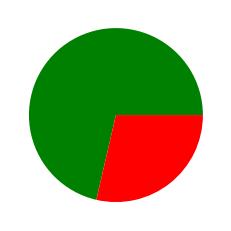

In [ ]:
sum_rating_A1=0
count=0
for i in tqdm(range(t)):
  sent=str(df.cleaned[i])
  toks=word_tokenize(sent)
  if  (fuzz.partial_token_set_ratio('interest rate',sent)>90) or (fuzz.token_set_ratio('loan rate',sent)>90)or (fuzz.token_set_ratio('high interest rate',sent)>90)or (fuzz.token_set_ratio('low interest rate',sent)>90):
    ind=1
  for tok in toks:
    if (fuzz.ratio('interest',tok)>80) or (fuzz.ratio('rate',tok)>=80):
      ind=1
  if ind==1:
    sum_rating_A1+=df.score[i]
    count+=1
  ind=0 
print(count,sum_rating_A1)
print(sum_rating_A1/count)
pie=sum_rating_A1/count
pi=[pie,(5-pie)]
plt.pie(pi,colors=['green','red'])

100%|██████████| 186080/186080 [00:53<00:00, 3493.45it/s]


3451 12313
3.5679513184584177


([<matplotlib.patches.Wedge at 0x7f9cb6bca0b8>,
 [Text(-0.6839581690375179, 0.8615110115412608, ''),
  Text(0.6839581690375178, -0.8615110115412608, '')])

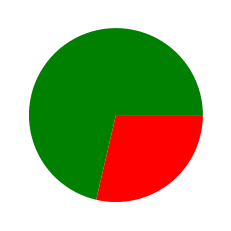

In [ ]:
sum_rating_A1=0
count=0
for i in tqdm(range(t)):
  sent=str(df.cleaned[i])
  toks=word_tokenize(sent)
  if  (fuzz.token_set_ratio('interest rate',sent)>90) or (fuzz.token_set_ratio('loan rate',sent)>90)or (fuzz.token_set_ratio('high interest rate',sent)>90)or (fuzz.token_set_ratio('low interest rate',sent)>90):
    ind=1
  for tok in toks:
    if (fuzz.ratio('interest',tok)>80) or (fuzz.ratio('rate',tok)>=80):
      ind=1
  if ind==1:
    sum_rating_A1+=df.score[i]
    count+=1
  ind=0 
print(count,sum_rating_A1)
print(sum_rating_A1/count)
pie=sum_rating_A1/count
pi=[pie,(5-pie)]
plt.pie(pi,colors=['green','red'])

100%|██████████| 3490/3490 [00:00<00:00, 5038.14it/s]


2573 1258


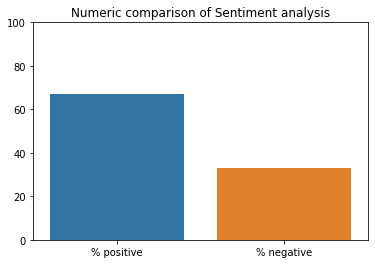

In [ ]:
pos,neg=0,0
for sent in tqdm(li_A1):
  dic=sia.polarity_scores(sent)
  if dic['pos']>0:
    pos+=1
  if dic['neg']>0:
    neg+=1
print(pos,neg)
values=[(pos/(pos+neg))*100,(neg/(neg+pos)*100)]
keys=['% positive','% negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,100))
plt.title('Numeric comparison of Sentiment analysis')
plt.show()

403
319
77
[50.438047559449316, 39.92490613266583, 9.637046307884855]


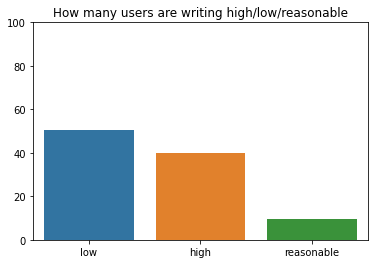

In [ ]:
low=0
for sent in li_A1:
  if ('low' in sent) or ('loanlow' in sent) or ('lowit' in sent) or ('lowest' in sent) or ('lower' in sent) or ('law' in sent) or('lowe' in sent):
    low+=1
print(low)
high=0
for sent in li_A1:
  toks=word_tokenize(sent)
  if (fuzz.token_set_ratio('high rate',sent)>90):
    high+=1
print(high)
comp=0
for sent in li_A1:
  if ('comparing' in sent) or ('descent' in sent) or ('reasonable' in sent) or ('competitive' in sent) or ('genuine' in sent) or ('comparision' in sent) or ('worth' in sent):
    comp+=1
print(comp)
li=[(low/(low+high+comp))*100,(high/(low+high+comp))*100,(comp/(low+high+comp))*100]
print(li)
key=['low','high','reasonable']
g=sns.barplot(x=key,y=li)
g.set(ylim=(0,100))
plt.title('How many users are writing high/low/reasonable')
plt.show()

In [ ]:
wwv.wv.most_similar(positive=['emi'],topn=40)

[('installment', 0.8752925992012024),
 ('emis', 0.8355523347854614),
 ('due', 0.8054152131080627),
 ('th', 0.7817105054855347),
 ('overdue', 0.7742011547088623),
 ('date', 0.7720156311988831),
 ('remain', 0.7666980028152466),
 ('outstanding', 0.7642381191253662),
 ('penalty', 0.7611658573150635),
 ('emithank', 0.7609744071960449),
 ('amount', 0.7541785836219788),
 ('onlybut', 0.7540626525878906),
 ('manually', 0.7508944272994995),
 ('ec', 0.7477191686630249),
 ('cheque', 0.7455698847770691),
 ('june', 0.7417487502098083),
 ('july', 0.7412968873977661),
 ('repayment', 0.735490620136261),
 ('principle', 0.7268446087837219),
 ('august', 0.7252331972122192),
 ('instalment', 0.7226091623306274),
 ('twice', 0.7224116921424866),
 ('stetments', 0.7215321660041809),
 ('nd', 0.7197648286819458),
 ('april', 0.7171863913536072),
 ('updateits', 0.7166522145271301),
 ('lavied', 0.7164427042007446),
 ('payment', 0.716436505317688),
 ('feb', 0.7134344577789307),
 ('paid', 0.7123507857322693),
 ('charg

100%|██████████| 186080/186080 [00:56<00:00, 3297.08it/s]



 5677
0.07251708500989973
{'neg': 0.158, 'neu': 0.67, 'pos': 0.172, 'compound': 1.0}


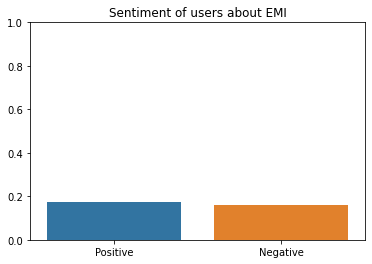

In [ ]:
from fuzzywuzzy import fuzz
from nltk.tokenize import word_tokenize
ind=0
count=0
review_about_A2=''
li_A2=[]
for sent in tqdm(df['cleaned']):
  sent=str(sent)
  toks=word_tokenize(sent)
  if  (fuzz.token_set_ratio('emi installment',sent)>90) or (fuzz.token_set_ratio('delayed instalment',sent)>90)or (fuzz.token_set_ratio('due payment emi',sent)>90)or (fuzz.token_set_ratio('emi installment',sent)>90):
    ind=1
  for tok in toks:
    if (fuzz.ratio('emi',tok)>90) or (fuzz.ratio('installment',tok)>90)or (fuzz.ratio('overdue',tok)>90) or (fuzz.ratio('outstanding',tok)>90):
      ind=1
  if ind==1:
    count+=1
    review_about_A2=review_about_A2+sent+' '
    li_A2.append(sent)
  ind=0

print('\n',count)
print(count/total)
dic=sia.polarity_scores(review_about_A2)
print(dic)
values=[dic['pos'],dic['neg']]
keys=['Positive','Negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,1))
plt.title('Sentiment of users about EMI')
plt.show()

100%|██████████| 186080/186080 [00:52<00:00, 3539.78it/s]



 5404
0.06902982691447915
{'neg': 0.155, 'neu': 0.669, 'pos': 0.176, 'compound': 1.0}


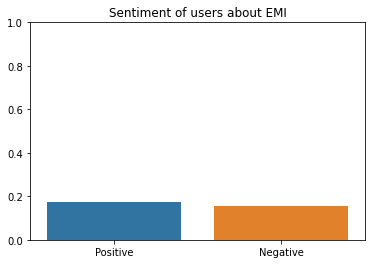

In [ ]:
from fuzzywuzzy import fuzz
from nltk.tokenize import word_tokenize
ind=0
count=0
review_about_A2=''
li_A2=[]
for sent in tqdm(df['cleaned']):
  sent=str(sent)
  toks=word_tokenize(sent)
  if  (fuzz.token_set_ratio('emi installment',sent)>90) or (fuzz.token_set_ratio('delayed instalment',sent)>90)or (fuzz.token_set_ratio('due payment emi',sent)>90)or (fuzz.token_set_ratio('emi installment',sent)>90):
    ind=1
  for tok in toks:
    if (fuzz.ratio('emi',tok)>90) or (fuzz.ratio('installment',tok)>90)or (fuzz.ratio('outstanding',tok)>90):
      ind=1
  if ind==1:
    count+=1
    review_about_A2=review_about_A2+sent+' '
    li_A2.append(sent)
  ind=0

print('\n',count)
print(count/total)
dic=sia.polarity_scores(review_about_A2)
print(dic)
values=[dic['pos'],dic['neg']]
keys=['Positive','Negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,1))
plt.title('Sentiment of users about EMI')
plt.show()

100%|██████████| 186080/186080 [00:58<00:00, 3195.21it/s]

5404 11954
2.2120651369356032


([<matplotlib.patches.Wedge at 0x7f9cb6a16080>,
 [Text(0.19792246552372347, 1.0820474562795344, ''),
  Text(-0.1979224655237236, -1.0820474562795344, '')])

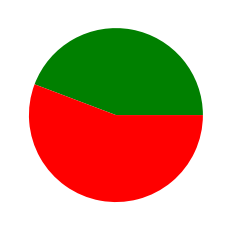

In [ ]:
sum_rating_A2=0
count=0
for i in tqdm(range(t)):
  sent=str(df.cleaned[i])
  toks=word_tokenize(sent)
  if (fuzz.token_set_ratio('emi installment',sent)>90) or (fuzz.token_set_ratio('delayed instalment',sent)>90)or (fuzz.token_set_ratio('due payment emi',sent)>90)or (fuzz.token_set_ratio('emi installment',sent)>90):
    ind=1
  for tok in toks:
    if (fuzz.ratio('emi',tok)>90) or (fuzz.ratio('installment',tok)>90)or (fuzz.ratio('outstanding',tok)>90):
      ind=1
  if ind==1:
    sum_rating_A2+=df.score[i]
    count+=1
  ind=0 
print(count,sum_rating_A2)
print(sum_rating_A2/count)
pie=sum_rating_A2/count
pi=[pie,(5-pie)]
plt.pie(pi,colors=['green','red'])

100%|██████████| 5404/5404 [00:01<00:00, 3142.06it/s]


3828 3540


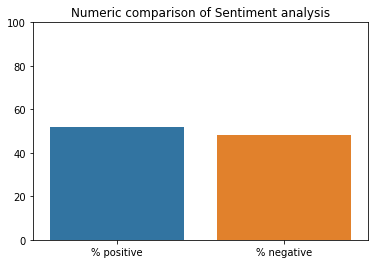

In [ ]:
pos,neg=0,0
for sent in tqdm(li_A2):
  dic=sia.polarity_scores(sent)
  if dic['pos']>0:
    pos+=1
  if dic['neg']>0:
    neg+=1
print(pos,neg)

values=[(pos/(pos+neg))*100,(neg/(neg+pos)*100)]
keys=['% positive','% negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,100))
plt.title('Numeric comparison of Sentiment analysis')
plt.show()

100%|██████████| 186080/186080 [01:17<00:00, 2398.30it/s]



 1399
0.017870601009133295
{'neg': 0.172, 'neu': 0.634, 'pos': 0.194, 'compound': 0.9999}


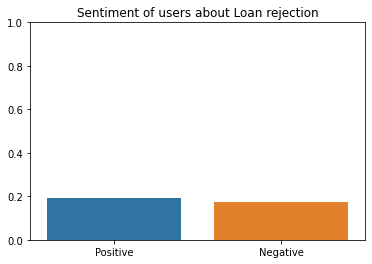

In [ ]:
from fuzzywuzzy import fuzz
from nltk.tokenize import word_tokenize
ind=0
count=0
review_about_A3=''
li_A3=[]
for sent in tqdm(df['cleaned']):
  sent=str(sent)
  toks=word_tokenize(sent)
  if  (fuzz.token_set_ratio('loyal but',sent)>80) or (fuzz.token_set_ratio('not giving loan',sent)>90)or (fuzz.token_set_ratio('not getting loan',sent)>90)or(fuzz.token_set_ratio('regular customer but not getting loan',sent)>80)or (fuzz.token_set_ratio('regualar customer blocked',sent)>80)or (fuzz.token_set_ratio('rejected application',sent)>90)or (fuzz.token_set_ratio('blocked user profile', sent)>80) or (fuzz.token_set_ratio('blocked account',sent)>80):
    ind=1
  for tok in toks:
    if  (fuzz.ratio('loyal',tok)>=80) or (fuzz.ratio('regular',tok)>80)or (fuzz.ratio('rejected',tok)>90)or (fuzz.ratio('reapply',tok)>90)or (fuzz.ratio('blocked',tok)>90):
      ind=1
  if ind==1:
    count+=1
    review_about_A3=review_about_A3+sent+' '
    li_A3.append(sent)
  ind=0

print('\n',count)
print(count/total)
dic=sia.polarity_scores(review_about_A3)
print(dic)
values=[dic['pos'],dic['neg']]
keys=['Positive','Negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,1))
plt.title('Sentiment of users about Loan rejection')
plt.show()

100%|██████████| 186080/186080 [01:25<00:00, 2186.14it/s]

1399 3571
2.5525375268048607


([<matplotlib.patches.Wedge at 0x7f9cb5a2d588>,
 [Text(-0.036304596108545396, 1.0994007350831614, ''),
  Text(0.03630449317521985, -1.0994007384822382, '')])

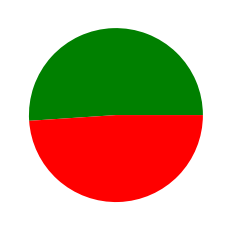

In [ ]:
sum_rating_A3=0
count=0
for i in tqdm(range(t)):
  sent=str(df.cleaned[i])
  toks=word_tokenize(sent)
  if  (fuzz.token_set_ratio('loyal but',sent)>80) or (fuzz.token_set_ratio('not giving loan',sent)>90)or (fuzz.token_set_ratio('not getting loan',sent)>90)or(fuzz.token_set_ratio('regular customer but not getting loan',sent)>80)or (fuzz.token_set_ratio('regualar customer blocked',sent)>80)or (fuzz.token_set_ratio('rejected application',sent)>90)or (fuzz.token_set_ratio('blocked user profile', sent)>80) or (fuzz.token_set_ratio('blocked account',sent)>80):
    ind=1
  for tok in toks:
    if  (fuzz.ratio('loyal',tok)>=80) or (fuzz.ratio('regular',tok)>80)or (fuzz.ratio('rejected',tok)>90)or (fuzz.ratio('reapply',tok)>90)or (fuzz.ratio('blocked',tok)>90):
      ind=1
  if ind==1:
    sum_rating_A3+=df.score[i]
    count+=1
  ind=0 
print(count,sum_rating_A3)
print(sum_rating_A3/count)
pie=sum_rating_A3/count
pi=[pie,(5-pie)]
plt.pie(pi,colors=['green','red'])

100%|██████████| 1399/1399 [00:00<00:00, 4745.04it/s]


760 733


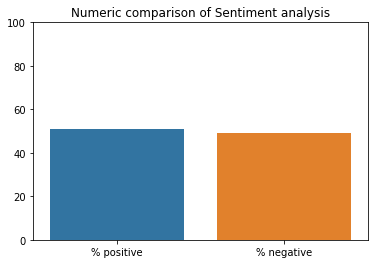

In [ ]:
pos,neg=0,0
for sent in tqdm(li_A3):
  dic=sia.polarity_scores(sent)
  if dic['pos']>0:
    pos+=1
  if dic['neg']>0:
    neg+=1
print(pos,neg)

values=[(pos/(pos+neg))*100,(neg/(neg+pos)*100)]
keys=['% positive','% negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,100))
plt.title('Numeric comparison of Sentiment analysis')
plt.show()

100%|██████████| 186080/186080 [01:12<00:00, 2560.45it/s]



 21126
0.2698601264610079
{'neg': 0.136, 'neu': 0.577, 'pos': 0.287, 'compound': 1.0}


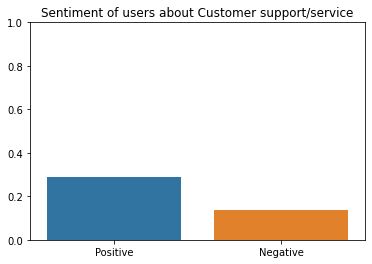

In [ ]:
from nltk.tokenize import word_tokenize
from fuzzywuzzy import fuzz 
count=0
review_about_A5=''
ind=0
li_A5=[]
for sent in tqdm(df['cleaned']):
  sent=str(sent)
  toks=word_tokenize(str(sent))
  if (fuzz.token_set_ratio('customer support',sent)>70) or (fuzz.token_set_ratio('customer service',sent)>80)or (fuzz.token_set_ratio('user friendly',sent)>80)or (fuzz.token_set_ratio('customer care',sent)>80):
    ind=1
  for tok in toks:
    if (fuzz.ratio('customer',tok)>=80) or (fuzz.ratio('service',tok)>90)or (fuzz.ratio('support',tok)>90)or (fuzz.ratio('message',tok)>90)or (fuzz.ratio('response',tok)>90)or (fuzz.ratio('reply',tok)>90):
      ind=1
  if ind==1:
    review_about_A5=review_about_A5+sent+' '
    li_A5.append(sent)
    count+=1
  ind=0
print('\n',count)
print(count/total)
dic=sia.polarity_scores(review_about_A5)
print(dic)
values=[dic['pos'],dic['neg']]
keys=['Positive','Negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,1))
plt.title('Sentiment of users about Customer support/service')
plt.show()

100%|██████████| 186080/186080 [01:09<00:00, 2692.75it/s]



 61342 21126
2.9036258638644323


([<matplotlib.patches.Wedge at 0x7f9cb59ef4e0>,
 [Text(-0.2759855176777073, 1.0648154741701343, ''),
  Text(0.2759855176777074, -1.0648154741701343, '')])

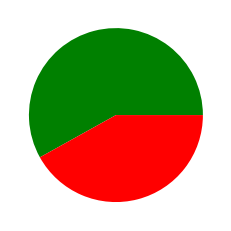

In [ ]:
from nltk.tokenize import word_tokenize
from fuzzywuzzy import fuzz 
count=0
sum_rating_A5=0
ind=0
for i in tqdm(range(t)):
  sent=df.cleaned[i]
  toks=word_tokenize(str(sent))
  if (fuzz.token_set_ratio('customer support',sent)>70) or (fuzz.token_set_ratio('customer service',sent)>80)or (fuzz.token_set_ratio('user friendly',sent)>80)or (fuzz.token_set_ratio('customer care',sent)>80):
    ind=1
  for tok in toks:
    if (fuzz.ratio('customer',tok)>=80) or (fuzz.ratio('service',tok)>90)or (fuzz.ratio('support',tok)>90)or (fuzz.ratio('message',tok)>90)or (fuzz.ratio('response',tok)>90)or (fuzz.ratio('reply',tok)>90):
      ind=1
  if ind==1:
    sum_rating_A5+=df.score[i]
    count+=1
  ind=0
print('\n',sum_rating_A5,count)
print(sum_rating_A5/count)
pie=sum_rating_A5/count
pi=[pie,(5-pie)]
plt.pie(pi,colors=['green','red'])

17363 9835


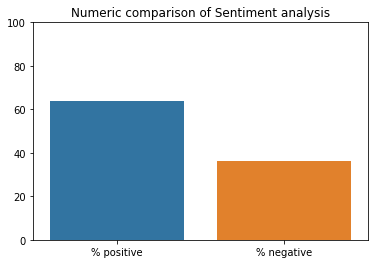

In [ ]:
pos,neg=0,0
for sent in li_A5:
  dic=sia.polarity_scores(sent)
  if dic['pos']>0:
    pos+=1
  if dic['neg']>0:
    neg+=1
print(pos,neg)

values=[(pos/(pos+neg))*100,(neg/(neg+pos)*100)]
keys=['% positive','% negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,100))
plt.title('Numeric comparison of Sentiment analysis')
plt.show()

100%|██████████| 186080/186080 [01:42<00:00, 1815.27it/s]



 9841 0.12570735134444658
{'neg': 0.147, 'neu': 0.634, 'pos': 0.219, 'compound': 1.0}


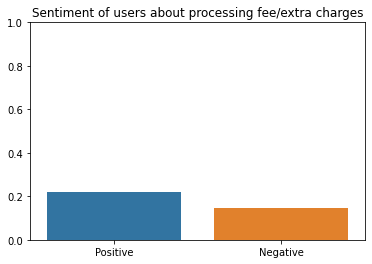

In [ ]:
from nltk.tokenize import word_tokenize
from fuzzywuzzy import fuzz 
count=0
review_about_A6=''
li_A6=[]
for sent in tqdm(df['cleaned']):
  sent=str(sent)
  toks=word_tokenize(str(sent))
  if (fuzz.token_set_ratio('processing fee',sent)>70) or (fuzz.token_set_ratio('process fee',sent)>80)or (fuzz.token_set_ratio('hidden charges',sent)>80)or (fuzz.ratio('extra cost',sent)>80):
    ind=1
  for tok in toks:
    if (fuzz.ratio('fee',tok)>=80) or (fuzz.ratio('charge',tok)>90)or (fuzz.ratio('hidden',tok)>90)or (fuzz.ratio('cost',tok)>90)or (fuzz.ratio('processing',tok)>90)or (fuzz.ratio('tax',tok)>90)or (fuzz.ratio('taxation',tok)>90)or (fuzz.partial_ratio('looting', tok)>90)or (fuzz.ratio('loot',tok)>90)or (fuzz.ratio('extra',tok)>90)or (fuzz.ratio('gst',tok)>=80)or (fuzz.ratio('overdue',tok)>90)or (fuzz.ratio('bounce',tok)>90):
      ind=1
  if ind==1:
    review_about_A6=review_about_A6+sent+' '
    li_A6.append(sent)
    count+=1
  ind=0
print('\n',count,count/total)
dic=sia.polarity_scores(review_about_A6)
print(dic)
values=[dic['pos'],dic['neg']]
keys=['Positive','Negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,1))
plt.title('Sentiment of users about processing fee/extra charges')
plt.show()

In [ ]:
print(dic)

100%|██████████| 186080/186080 [01:44<00:00, 1784.16it/s]



 2.576465806320496


([<matplotlib.patches.Wedge at 0x7f9cb3b0cba8>,
 [Text(-0.052829109528005375, 1.0987306699944615, ''),
  Text(0.05282910952800524, -1.0987306699944615, '')])

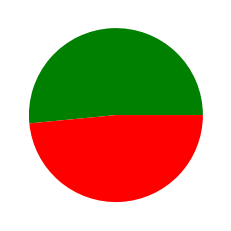

In [ ]:
count=0
sum_rating_A6=0
for i in tqdm(range(t)):
  sent=str(df['cleaned'][i])
  toks=word_tokenize(sent)
  if (fuzz.token_set_ratio('processing fee',sent)>70) or (fuzz.token_set_ratio('process fee',sent)>80)or (fuzz.token_set_ratio('hidden charges',sent)>80)or (fuzz.ratio('extra cost',sent)>80):
    ind=1
  for tok in toks:
    if (fuzz.ratio('fee',tok)>=80) or (fuzz.ratio('charge',tok)>90)or (fuzz.ratio('hidden',tok)>90)or (fuzz.ratio('cost',tok)>90)or (fuzz.ratio('processing',tok)>90)or (fuzz.ratio('tax',tok)>90)or (fuzz.ratio('taxation',tok)>90)or (fuzz.partial_ratio('looting', tok)>90)or (fuzz.ratio('loot',tok)>90)or (fuzz.ratio('extra',tok)>90)or (fuzz.ratio('gst',tok)>=80)or (fuzz.ratio('overdue',tok)>90)or (fuzz.ratio('bounce',tok)>90):
      ind=1
  if ind==1:
    count+=1
    sum_rating_A6+=df.score[i]
  ind=0
print('\n',sum_rating_A6/count)
pie=sum_rating_A6/count
pi=[pie,(5-pie)]
plt.pie(pi,colors=['green','red'])

100%|██████████| 9841/9841 [00:02<00:00, 3801.36it/s]


7117 5538


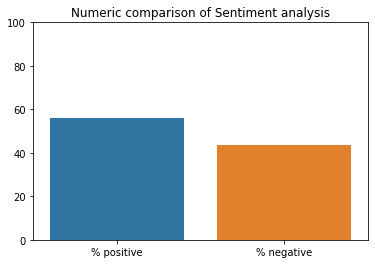

In [ ]:
pos,neg=0,0
for sent in tqdm(li_A6):
  dic=sia.polarity_scores(sent)
  if dic['pos']>0:
    pos+=1
  if dic['neg']>0:
    neg+=1
print(pos,neg)

values=[(pos/(pos+neg))*100,(neg/(neg+pos)*100)]
keys=['% positive','% negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,100))
plt.title('Numeric comparison of Sentiment analysis')
plt.show()

100%|██████████| 186080/186080 [01:30<00:00, 2045.81it/s]



 16432 0.20989972536245768
{'neg': 0.168, 'neu': 0.645, 'pos': 0.187, 'compound': 1.0}


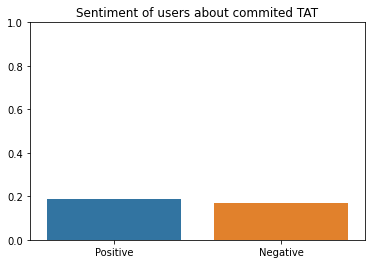

In [ ]:
from nltk.tokenize import word_tokenize
from fuzzywuzzy import fuzz 
count=0
review_about_A7=''
ind=0
li_A7=[]
for sent in tqdm(df['cleaned']):
  sent=str(sent)
  toks=word_tokenize(str(sent))
  if (fuzz.token_set_ratio('waiting approval',sent)>70):
    ind=1
  for tok in toks:
    if (fuzz.ratio('time',tok)>=80) or (fuzz.ratio('late',tok)>90)or (fuzz.ratio('waiting',tok)>90)or (fuzz.ratio('delay',tok)>90)or (fuzz.ratio('tenure',tok)>90)or (fuzz.ratio('limit',tok)>90)or (fuzz.ratio('long',tok)>90)or (fuzz.ratio('date',tok)>90)or (fuzz.ratio('emergency',tok)>90)or (fuzz.ratio('quick',tok)>90)or (fuzz.ratio('speedy',tok)>90)or (fuzz.ratio('disburse',tok)>90)or (fuzz.ratio('pending',tok)>90)or (fuzz.ratio('wait',tok)>90):
      ind=1
  if ind==1:
    review_about_A7=review_about_A7+sent+' '
    li_A7.append(sent)
    count+=1
  ind=0
print('\n',count,count/total)
dic=sia.polarity_scores(review_about_A7)
print(dic)
values=[dic['pos'],dic['neg']]
keys=['Positive','Negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,1))
plt.title('Sentiment of users about commited TAT')
plt.show()  

100%|██████████| 186080/186080 [01:29<00:00, 2089.54it/s]



 16432 2.424659201557936


([<matplotlib.patches.Wedge at 0x7f9cb2509828>,
 [Text(0.052052320568805856, 1.0987677443042285, ''),
  Text(-0.052052217694744905, -1.0987677491777137, '')])

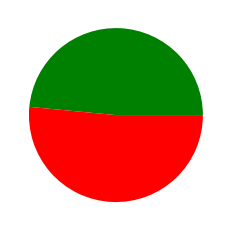

In [ ]:
count=0
sum_rating_A7=0
for i in tqdm(range(t)):
  sent=str(df['cleaned'][i])
  sent=str(sent)
  toks=word_tokenize(sent)
  if (fuzz.token_set_ratio('waiting approval',sent)>70):
    ind=1
  for tok in toks:
    if (fuzz.ratio('time',tok)>=80) or (fuzz.ratio('late',tok)>90)or (fuzz.ratio('waiting',tok)>90)or (fuzz.ratio('delay',tok)>90)or (fuzz.ratio('tenure',tok)>90)or (fuzz.ratio('limit',tok)>90)or (fuzz.ratio('long',tok)>90)or (fuzz.ratio('date',tok)>90)or (fuzz.ratio('emergency',tok)>90)or (fuzz.ratio('quick',tok)>90)or (fuzz.ratio('speedy',tok)>90)or (fuzz.ratio('disburse',tok)>90)or (fuzz.ratio('pending',tok)>90)or (fuzz.ratio('wait',tok)>90):
      ind=1
  if ind==1:
    count+=1
    sum_rating_A7+=df.score[i]
  ind=0
print('\n',count,sum_rating_A7/count)
pie=sum_rating_A7/count
pi=[pie,(5-pie)]
plt.pie(pi,colors=['green','red'])

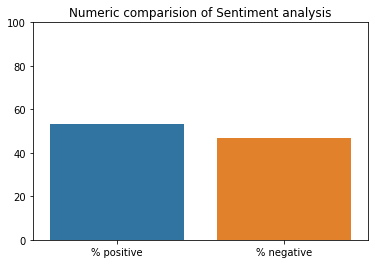

In [ ]:
pos,neg=0,0
for sent in li_A7:
  dic=sia.polarity_scores(sent)
  if (dic['pos']>0):
    pos+=1
  if (dic['neg']>0):
    neg+=1
values=[(pos/(pos+neg))*100,(neg/(neg+pos)*100)]
keys=['% positive','% negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,100))
plt.title('Numeric comparision of Sentiment analysis')
plt.show()

100%|██████████| 186080/186080 [01:15<00:00, 2477.89it/s]



 13849 0.17690489876732451
{'neg': 0.249, 'neu': 0.596, 'pos': 0.156, 'compound': -1.0}


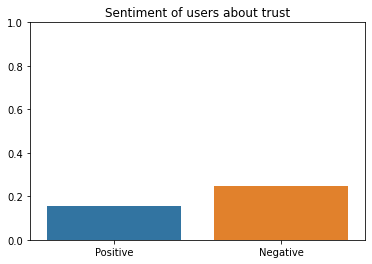

In [ ]:
from fuzzywuzzy import fuzz
from nltk.tokenize import word_tokenize
review_about_A8=''
li_A8=[]
ind=0
count=0
for sent in tqdm(df['cleaned']):
  sent=str(sent)
  toks=word_tokenize(sent)
  for tok in toks:
    if (fuzz.ratio('trust',tok)>90)or (fuzz.ratio('fake',tok)>90)or(fuzz.ratio('fraud',tok)>90)or (fuzz.ratio('waste',tok)>90)or (fuzz.ratio('harassment',tok)>90)or (fuzz.ratio('rbi',tok)>90)or (fuzz.ratio('nbfc',tok)>90) or (fuzz.ratio('law',tok)>90) or (fuzz.ratio('legal',tok)>90)or (fuzz.ratio('cheat',tok)>80)or (fuzz.ratio('scam',tok)>90)or (fuzz.ratio('uninstall',tok)>85):
      ind=1
  if ind==1:
    review_about_A8=review_about_A8+sent+' '
    li_A8.append(sent)
    count+=1
  ind=0
print('\n',count,count/total)
dic=sia.polarity_scores(review_about_A8)
print(dic)
values=[dic['pos'],dic['neg']]
keys=['Positive','Negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,1))
plt.title('Sentiment of users about trust')
plt.show() 

100%|██████████| 186080/186080 [01:13<00:00, 2541.92it/s]


 13849 1.7424362769875081


([<matplotlib.patches.Wedge at 0x7f9cb38b0358>,
 [Text(0.5040417729621536, 0.9777228089336819, ''),
  Text(-0.5040417729621539, -0.9777228089336818, '')])

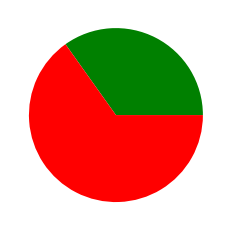

In [ ]:
ind=0
count=0
sum_rating_A8=0
for i in tqdm(range(t)):
  sent=str(df['cleaned'][i])
  toks=word_tokenize(sent)
  for tok in toks:
    if (fuzz.ratio('trust',tok)>90)or (fuzz.ratio('fake',tok)>90)or(fuzz.ratio('fraud',tok)>90)or (fuzz.ratio('waste',tok)>90)or (fuzz.ratio('harassment',tok)>90)or (fuzz.ratio('rbi',tok)>90)or (fuzz.ratio('nbfc',tok)>90) or (fuzz.ratio('law',tok)>90) or (fuzz.ratio('legal',tok)>90)or (fuzz.ratio('cheat',tok)>80)or (fuzz.ratio('scam',tok)>90)or (fuzz.ratio('uninstall',tok)>85):
      ind=1
  if ind==1:
    sum_rating_A8+=df.score[i]
    count+=1
  ind=0
print('\n',count,sum_rating_A8/count)
pie=sum_rating_A8/count
pi=[pie,(5-pie)]
plt.pie(pi,colors=['green','red'])

7409 11089


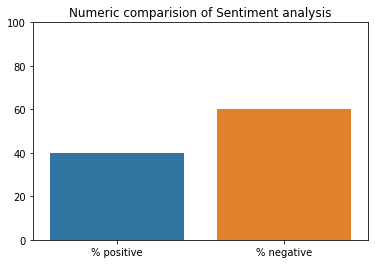

In [ ]:
pos,neg=0,0
for sent in li_A8:
  dic=sia.polarity_scores(sent)
  if (dic['pos']>0):
    pos+=1
  if (dic['neg']>0):
    neg+=1

print(pos,neg)
values=[(pos/(pos+neg))*100,(neg/(neg+pos)*100)]
keys=['% positive','% negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,100))
plt.title('Numeric comparision of Sentiment analysis')
plt.show()


100%|██████████| 186080/186080 [00:56<00:00, 3293.65it/s]



 3029 0.03869195886823785
{'neg': 0.071, 'neu': 0.573, 'pos': 0.357, 'compound': 1.0}


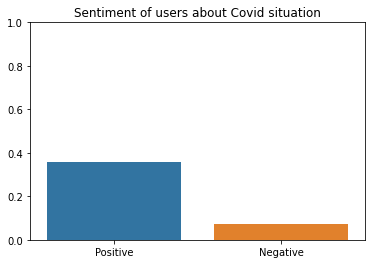

In [ ]:
ind=0
count=0
review_about_A9=''
li_A9=[]
for sent in tqdm(df['cleaned']):
  sent=str(sent)
  toks=word_tokenize(sent)
  if (fuzz.partial_token_set_ratio('covid situation',sent)>90)or (fuzz.token_set_ratio('corona virus',sent)>90):
    ind=1
  for tok in toks:
    if (fuzz.ratio('Kovid',tok)>90) or (fuzz.ratio('covid',tok)>90)or (fuzz.ratio('pandemic',tok)>90)or (fuzz.ratio('corona',tok)>90) or (fuzz.ratio('lockdown',tok)>90):
      ind=1
  if ind==1:
    count+=1
    review_about_A9=review_about_A9+sent+' '
    li_A9.append(sent)
  ind=0

print('\n',count,count/total)
dic=sia.polarity_scores(review_about_A9)
values=[dic['pos'],dic['neg']]
print(dic)
keys=['Positive','Negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,1))
plt.title('Sentiment of users about Covid situation')
plt.show() 

100%|██████████| 186080/186080 [01:00<00:00, 3092.90it/s]



 3029 4.206999009574117


([<matplotlib.patches.Wedge at 0x7f9cb43fbf98>,
 [Text(-0.9662584180986007, 0.5256849526604219, ''),
  Text(0.9662583934895107, -0.5256849978942431, '')])

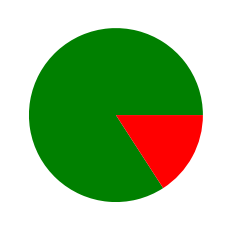

In [ ]:
count=0
sum_rating_A9=0
ind=0
for i in tqdm(range(t)):
  sent=str(df['cleaned'][i])
  toks=word_tokenize(sent)
  if (fuzz.partial_token_set_ratio('covid situation',sent)>90)or (fuzz.token_set_ratio('corona virus',sent)>90):
    ind=1
  for tok in toks:
    if (fuzz.ratio('Kovid',tok)>90) or (fuzz.ratio('covid',tok)>90)or (fuzz.ratio('pandemic',tok)>90)or (fuzz.ratio('corona',tok)>90) or (fuzz.ratio('lockdown',tok)>90):
      ind=1
  if ind==1:
    sum_rating_A9+=df.score[i]
    count+=1
  ind=0  
print('\n',count,sum_rating_A9/count)
pie=sum_rating_A9/count
pi=[pie,(5-pie)]
plt.pie(pi,colors=['green','red'])

2699 887


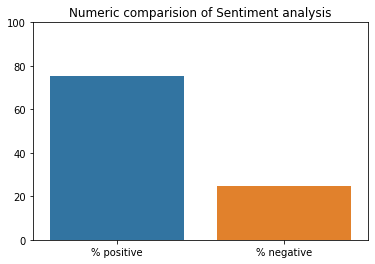

In [ ]:
pos,neg=0,0
for sent in li_A9:
  dic=sia.polarity_scores(sent)
  if (dic['pos']>0):
    pos+=1
  if (dic['neg']>0):
    neg+=1

print(pos,neg)
values=[(pos/(pos+neg))*100,(neg/(neg+pos)*100)]
keys=['% positive','% negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,100))
plt.title('Numeric comparision of Sentiment analysis')
plt.show()

In [ ]:
key=['Interest rate value','Delayed EMI payment problems','Loan rejection though good characteristics','Customer Support','Processing fee/charges','Meeting committed TAT','Customer trust','Covid effect']
y=[4.45,6.90,1.78,26.98,12.57,20.98,17.69,3.86]

In [ ]:
key=['Interest rate value','Delayed EMI payment problems','Loan rejection though good characteristics','Customer Support','Processing fee/charges','Meeting committed TAT','Customer trust','Covid effect']
y=[3.57,2.21,2.51,2.90,2.57,2.42,1.74,4.20]

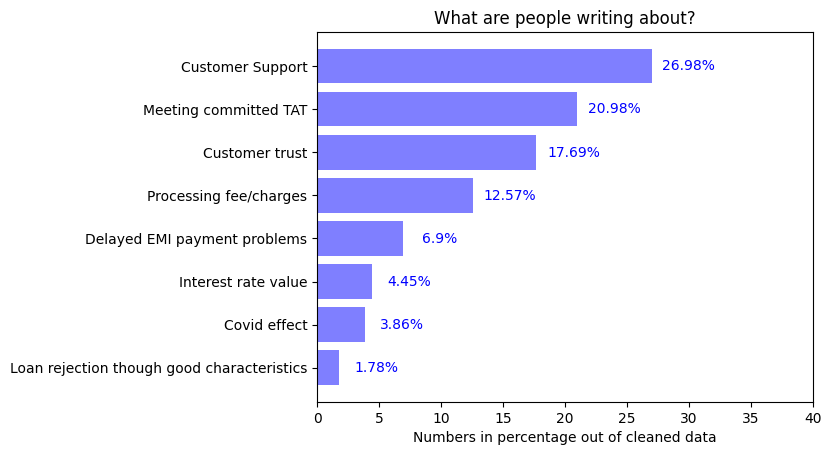

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
key=['Interest rate value','Delayed EMI payment problems','Loan rejection though good characteristics','Customer Support','Processing fee/charges','Meeting committed TAT','Customer trust','Covid effect']
y=[4.45,6.90,1.78,26.98,12.57,20.98,17.69,3.86]
d=pd.DataFrame(key,columns=['key'])
d['y']=y
d=d.sort_values(by='y')
key=list(d.key)
y=list(d.y)


objects = tuple(key)
y_pos = np.arange(len(objects))
performance = y
fig, ax = plt.subplots()
ax.barh(y_pos, performance, align='center', alpha=0.5,color='blue')
plt.xlim(0,40)
plt.yticks(y_pos, objects)
plt.xlabel('Numbers in percentage out of cleaned data')
plt.title('What are people writing about?')
for i, v in enumerate(performance):
    ax.text(v + 3, i, str(v)+'%', color='blue',horizontalalignment='center',verticalalignment='center')
plt.show()

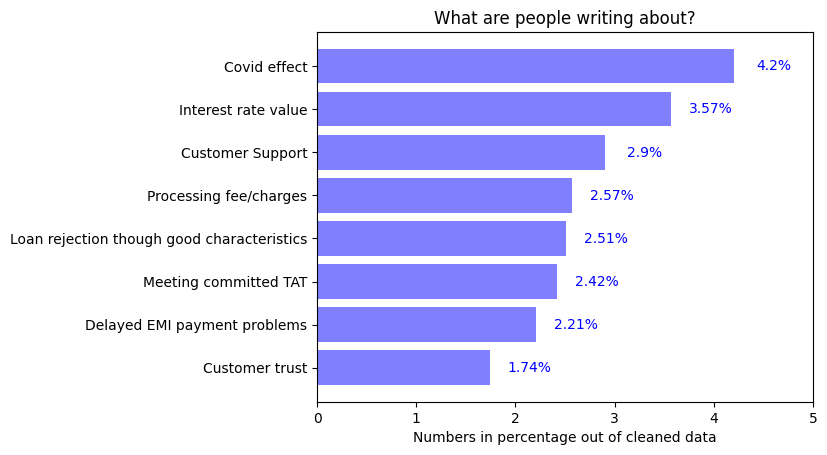

In [ ]:
key=['Interest rate value','Delayed EMI payment problems','Loan rejection though good characteristics','Customer Support','Processing fee/charges','Meeting committed TAT','Customer trust','Covid effect']
y=[3.57,2.21,2.51,2.90,2.57,2.42,1.74,4.20]
d=pd.DataFrame(key,columns=['key'])
d['y']=y
d=d.sort_values(by='y')
key=list(d.key)
y=list(d.y)
objects = tuple(key)
y_pos = np.arange(len(objects))
performance = y
fig, ax = plt.subplots()
ax.barh(y_pos, performance, align='center', alpha=0.5,color='blue')
plt.xlim(0,5)
plt.yticks(y_pos, objects)
plt.xlabel('Numbers in percentage out of cleaned data')
plt.title('What are people writing about?')
for i, v in enumerate(performance):
    ax.text(v+0.4 , i, str(v)+'%', color='blue',horizontalalignment='center',verticalalignment='center')
plt.show()